In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import connectheroku
import matplotlib.pyplot as plt

In [2]:
def make_query(query_string, cursorobject):
    cursorobject.execute(query_string)
    results = cursorobject.fetchall()
    column_names = [i[0] for i in cursorobject.description]
    cursorobject.close()
    df = pd.DataFrame(results, columns=column_names)
    return df

In [3]:
credential_file = '/Users/aliglara/Documents/MyGit/apis/credential_keys.json'

In [4]:
cursor = connectheroku.connect_database("c1_capstone", credential_file)

In [5]:
list_states = ['NY', 'OR', 'CA', 'WA', 'MA', 'CO', 'FL', 'AZ', 'PA', 'GA']

# Analizing the number of renter housing units by educational attainment level

The data was taken from the census.gov and it refers to the number of housing units available for rent, and the amount of occupied by people based on their educational level.

Therefore, the total of units by state represents the total number of renter housing units occupied by people based on their instructional level.

In [6]:
query = ("SELECT "
         "uspop.year, "
         "uspop.name_state, "
         "uspop.total_renter_occupied_units_educ_attainment, "
         "uspop.renter_occupied_units_high_school_graduate, "
         "uspop.renter_occupied_units_some_college_degree, "
         "uspop.renter_occupied_units_bachelor_degree_or_higher "
         " FROM us_population AS uspop"
         " WHERE uspop.id_state IN (SELECT sr.state FROM state_region AS sr "
         " WHERE sr.abbreviation IN ('" + "', '".join(list_states) + "') "
         ")")

In [7]:
renter_occupied_df = make_query(query, cursor)

In [8]:
renter_occupied_df

,year,name_state,total_renter_occupied_units_educ_attainment,renter_occupied_units_high_school_graduate,renter_occupied_units_some_college_degree,renter_occupied_units_bachelor_degree_or_higher
0,2015,New York,3394792,844820,845166,1100677
1,2015,Oregon,604314,134547,240163,161900
2,2015,Pennsylvania,1550281,528833,428517,383053
3,2015,Washington,1025304,230928,383616,302918
4,2015,Arizona,938180,219578,364196,210093
5,2015,California,5985534,1200022,1893017,1744084
6,2015,Colorado,752117,159916,272185,237783
7,2015,Florida,2703113,746895,905205,676010
8,2015,Georgia,1395241,381047,462321,326843
9,2015,Massachusetts,979998,256051,256315,324354


In [9]:
renter_occupied_df.rename(
    {'year': 'Year', 
     'name_state': 'State name', 
     'total_renter_occupied_units_educ_attainment': 'Total occupied units',
     'renter_occupied_units_high_school_graduate': 'HS graduate', # High School graduate
     'renter_occupied_units_some_college_degree' :'College degree',
     'renter_occupied_units_bachelor_degree_or_higher' : 'Bachelor degree or higher'}, axis='columns', inplace=True)

In [10]:
renter_occupied_df

,Year,State name,Total occupied units,HS graduate,College degree,Bachelor degree or higher
0,2015,New York,3394792,844820,845166,1100677
1,2015,Oregon,604314,134547,240163,161900
2,2015,Pennsylvania,1550281,528833,428517,383053
3,2015,Washington,1025304,230928,383616,302918
4,2015,Arizona,938180,219578,364196,210093
5,2015,California,5985534,1200022,1893017,1744084
6,2015,Colorado,752117,159916,272185,237783
7,2015,Florida,2703113,746895,905205,676010
8,2015,Georgia,1395241,381047,462321,326843
9,2015,Massachusetts,979998,256051,256315,324354


## Calculating the percentage of the units occupied by Bachelors or above. 

In [11]:
renter_occupied_df["Perc bachelor or higher"] = renter_occupied_df["Bachelor degree or higher"] / renter_occupied_df["Total occupied units"] * 100

In [12]:
renter_occupied_df.set_index(["Year", "State name"], inplace=True)

In [13]:
renter_occupied_df

Total occupied units  HS graduate  College degree  \
Year State name                                                         
2015 New York                    3394792       844820          845166   
     Oregon                       604314       134547          240163   
     Pennsylvania                1550281       528833          428517   
     Washington                  1025304       230928          383616   
     Arizona                      938180       219578          364196   
     California                  5985534      1200022         1893017   
     Colorado                     752117       159916          272185   
     Florida                     2703113       746895          905205   
     Georgia                     1395241       381047          462321   
     Massachusetts                979998       256051          256315   
2016 New York                    3367884       842587          832435   
     Oregon                       602099       134741          232715   
     Pennsylvania                1555257       527975          427384   
     Washington                  1038756       228848          382716   
     Arizona                      926038       218938          355514   
     California                  6000750      1172516         1895661   
     Colorado                     743160       169862          264391   
     Florida                     2716331       756690          897648   
     Georgia                     1417529       374613          460669   
     Massachusetts                980468       255927          247469   
2017 New York                    3374299       868719          822243   
     Oregon                       596620       138924          227762   
     Pennsylvania                1587734       568794          418801   
     Washington                  1056828       234076          393582   
     Arizona                      900651       217557          343966   
     California                  5880007      1167700         1835573   
     Colorado                     744383       162841          262026   
     Florida                     2679777       758775          893171   
     Georgia                     1390152       394684          444283   
     Massachusetts                981439       267497          244481   
2018 New York                    3413230       863831          822469   
     Oregon                       615117       139189          230828   
     Pennsylvania                1592286       537089          441936   
     Washington                  1076587       234401          390863   
     Arizona                      919931       212578          354676   
     California                  5906458      1203884         1823407   
     Colorado                     758776       158898          264440   
     Florida                     2661116       738646          860756   
     Georgia                     1376577       384552          438661   
     Massachusetts               1003582       243505          254588   
2019 New York                    3461296       875810          834760   
     Oregon                       612227       139477          235822   
     Pennsylvania                1617425       542907          445087   
     Washington                  1082785       232286          395085   
     Georgia                     1382142       364332          451772   
     Massachusetts               1002933       248245          245302   
     Florida                     2668313       735931          861242   
     Arizona                      927771       213954          354991   
     California                  5939131      1170712         1795291   
     Colorado                     763191       167779          257594   
2020 Pennsylvania                1584332       526036          438318   
     California                  5861796      1139471         1819433   
     New York                    3402708       836585          835974   
     

Pivot Table for aggregating the percentage of occupied houses by Bachelors pr above

In [14]:
perc_renter_unit_occupied_by_bacherlor_or_higher = renter_occupied_df.pivot_table(index="State name", 
                                                                                  columns="Year", 
                                                                                  values="Perc bachelor or higher").round(2)

In [15]:
perc_renter_unit_occupied_by_bacherlor_or_higher = perc_renter_unit_occupied_by_bacherlor_or_higher.transpose()

In [16]:
perc_renter_unit_occupied_by_bacherlor_or_higher

State name,Arizona,California,Colorado,Florida,Georgia,Massachusetts,New York,Oregon,Pennsylvania,Washington
Year,,,,,,,,,,
2015,22.39,29.14,31.62,25.01,23.43,33.10,32.42,26.79,24.71,29.54
2016,24.14,29.95,31.16,25.11,25.34,33.59,32.53,27.62,26.28,30.21
2017,23.97,30.93,32.82,25.01,24.60,34.08,32.75,27.56,25.58,30.44
2018,24.20,31.28,33.89,27.12,25.55,36.35,33.50,28.67,26.56,31.98
2019,25.05,32.64,35.35,27.21,26.87,37.79,34.94,29.36,27.00,32.41
2020,25.83,32.31,34.15,27.11,26.41,36.67,34.59,29.59,27.45,32.10


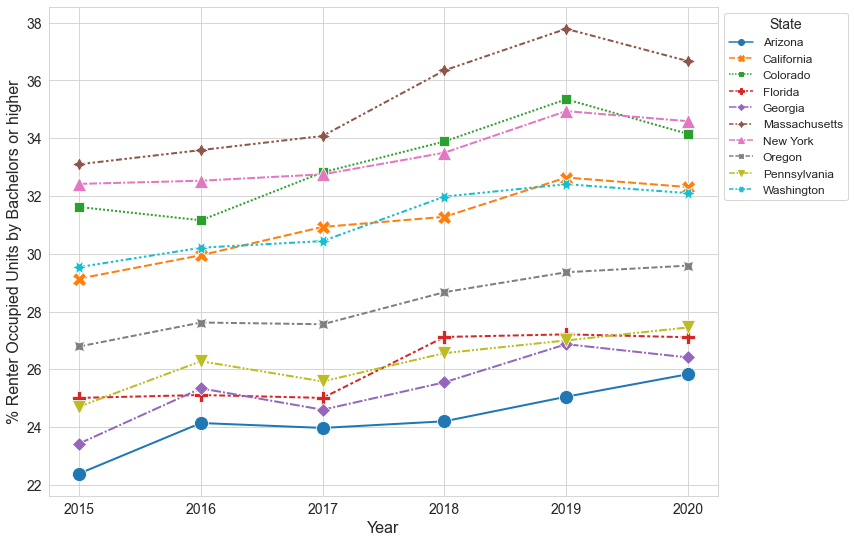

In [18]:
fig, ax = plt.subplots(figsize=(12, 9))
g = sns.lineplot(data=perc_renter_unit_occupied_by_bacherlor_or_higher, 
                 ax=ax, markers=True, markersize=14, lw=2)
ax.set_ylabel("% Renter Occupied Units by Bachelors or higher", fontsize=16)
ax.set_xlabel("Year", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(loc=2, bbox_to_anchor= (1,1),
           title="State", fontsize=12, title_fontsize=14)
plt.show()
